<center><h1>AI in Web Development</h1></center>

---

<center><h2>Lesson 03</h2></center>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/knpatel2/ai-webdev/blob/main/lessons/lesson-03/lesson-03.knpatel2.ipynb)

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2

# What are spatial or "local" relationships?
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download.png?raw=true)
![two](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(1).png?raw=true)
![three](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(2).png?raw=true)

# What kinds of problems can be solved using CNNs?
**CNNS excel when used on *unstructured* data**
- Audio
- Text
- Images
- Videos

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(3).png?raw=true)

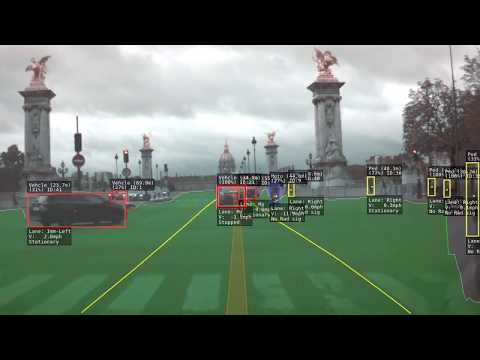

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("_1MHGUC_BzQ")

# The Basics of Convolution
Yellow - **kernel** (called weights or filters)

Green - image

Pink - output of convolution, called an activation or **feature map**

When CNNs are trained, these kernels are updated during backpropagation to find the optimal values of each of the filters.

![gif](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/giphy.gif?raw=true)

# Lets see it in action
http://setosa.io/ev/image-kernels/

In [5]:
# create a 2D matrix and a 3 by 3 kernel (2d matrix as well)

matrix = np.array([
                   [0, 1, 1, 0, 1],
                   [1, 0, 0, 1, 1],
                   [1, 1, 0, 0, 0],
                   [1, 1, 0, 1, 0]
])

kernel = np.array([
                   [-1, -1, -1],
                   [-1, 0, -1],
                   [-1, -1, -1]
])

In [18]:
# write a function to do 2D convolutions using numpy
def convolve(image, kernel, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = kernel.shape[0]
    yImgShape = kernel.shape[1]

    xOutput = int(((xImgShape - xKernShape) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    for y in range(image.shape[1]):
      if y > image.shape[1] - yKernShape:
        break
      
      if y % strides == 0:
        for x in range(image.shape[0]):
          if x > image.shape[0] - xKernShape:
            break

          try:
            if x % strides == 0:
              print("Convolution")
              print(image[x: x + xKernShape, y: y + yKernShape])
              print(kernel)
              print(kernel + image[x: x + xKernShape, y: y + yKernShape])
              print((kernel + image[x: x + xKernShape, y: y + yKernShape]).sum())
              output[x, y] = (kernel + image[x: x + xKernShape, y: y + yKernShape]).sum()
              print(output[x, y])
              print("=" * 25)
          except:
            break

    return output

In [19]:
print(convolve(matrix, kernel))

Convolution
[[0 1 1]
 [1 0 0]
 [1 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[-1  0  0]
 [ 0  0 -1]
 [ 0  0 -1]]
-3
-3.0
Convolution
[[1 0 0]
 [1 1 0]
 [1 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0 -1 -1]
 [ 0  1 -1]
 [ 0  0 -1]]
-3
Convolution
[[1 1 0]
 [0 0 1]
 [1 0 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0  0 -1]
 [-1  0  0]
 [ 0 -1 -1]]
-4
Convolution
[[1 0 1]
 [0 1 1]
 [0 0 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0 -1  0]
 [-1  1  0]
 [-1 -1 -1]]
-4
[[-3.]]


In [ ]:
# run function on matrix and kernel with a stride of 3

# What is an image?
An image is technically 3D: (width, height, number of channels).
A typical image is RGB format, 3 channels representing red, green, and blue values of each pixel.
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(4).png?raw=true)

In [ ]:
image_file = "https://i.kym-cdn.com/entries/icons/mobile/000/013/564/doge.jpg"
# load file using skimage into numpy array

In [ ]:
# display image using plt

In [ ]:
# print image shape

In [ ]:
# print each channel of the image

# How do we convolve images?
- Most images are colored, and have 3 channels (red, green, and blue)
- Initial filters then, must also be 3 channels deep
- One convolution is now the dot product of 27 values (3 x 3 x 3)
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(5).png?raw=true)

# Extracting Many Features
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(6).png?raw=true)

In [ ]:
# use a top sobel kernel and apply it to the image we loaded

# What do the filters learn?
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(7).png?raw=true)

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(8).png?raw=true)

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(9).png?raw=true)

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(10).png?raw=true)

# Properties of Kernels
**Stride** number of pixels the filter skips after each convolution. We have shown a stride of one so far.

Stride of 1:
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(11).png?raw=true)

Stride of two:
![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(12).png?raw=true)

**Padding**: adding pixels to the edges of the image, so the filter fits properly when being convolved across.
- Zero padding: pad edges with zeros
- Valid padding: no padding, drop edges of images that doesn't fit
- Reflective padding: pad edges with reflections of them

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(13).png?raw=true)

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(14).png?raw=true)

# Activation functions for Convolutional Layers
In practice, it seems the ReLU function performs the best for image tasks. There is much research on why this is the case, but for now keep it in mind when working with CNNs.

Intuitively, negative features are ones that the network should ignore, vs positive features are ones that the model should focus on. 

# The Magic of Pooling
Downsampling the input to reduce the size and enable the model to generalize feature extraction across varying orientations and scale of the image.

Intuitively: picking the **best** feature from each *window* when pooling.

- Max pooling
- Average pooling
- Global pooling

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(15).png?raw=true)

In [ ]:
# create a matrix and apply 2d max pooling to the matrix using numpy

# Preventing overfitting and reducing training time
Dropout: we have seen it before

Batch Normalization: normalizing activations (kernels) after a CNN layer.
- Meaning the output has a mean of 0 and standard deviation of 1

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(16).png?raw=true)

# How do we classify the feature maps?
1. Turn 3D output in 1D array
2. Input into fully connected layers we have use before
3. Use output layer and labels to train

![one](https://github.com/snsie/ai-webdev/blob/main/lessons/lesson-03/images/download%20(17).png?raw=true)

In [ ]:
# print the matrix we are working with again

In [ ]:
# apply global average pooling to the sample matrix

# Output activation functions
- **Softmax**: Creates a distribution where each value is positive and all values sum to 1
    - Best for **single-label**, multi-class classification
- **Sigmoid**: Values will be between 0 and 1, will not add to 1
    - Best for **multi-label**, multi-class classification

In [ ]:
# create the softmax and sigmoid functions, then apply them to an example 1d array of random values

# Recap of CNNs
![one](https://github.com/knpatel2/ai-webdev/blob/main/lessons/lesson-03/images/download%20(18).png?raw=true)